# Model: Naive Bayes

### Importing Libraries

In [1]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### Loading in Data

In [2]:
df = pd.read_excel('../top10_corr_features.xlsx')
df = df.drop(df.columns[0], axis = 1)

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Splitting the Data

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Helper Functions

#### Function for plotting confusion matrix

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

## Modeling
The preferred evaluation metric used will be __Precision__ for each class.  They will be optimized using the __F1 Score-Macro-Average__ to balance the Precision and Recall.  This is done because we want to not only be correct when predicting but also make a decent amount of predictions for each class.  Classes such as 'Buy' and 'Sell' are more important than 'Hold'.

### Fitting and Training

In [6]:
# Importing the model
from sklearn.naive_bayes import GaussianNB

# Fitting and training
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Printing out Evaluation Metrics

In [7]:
# Classifier predictions
pred = clf.predict(X_test)

#Printing out results
report = classification_report(y_test, pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.00      0.00      0.00         8
         Buy       0.38      0.50      0.43         6
        Hold       0.11      0.33      0.17         3

    accuracy                           0.24        17
   macro avg       0.16      0.28      0.20        17
weighted avg       0.15      0.24      0.18        17



C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Confusion Matrix

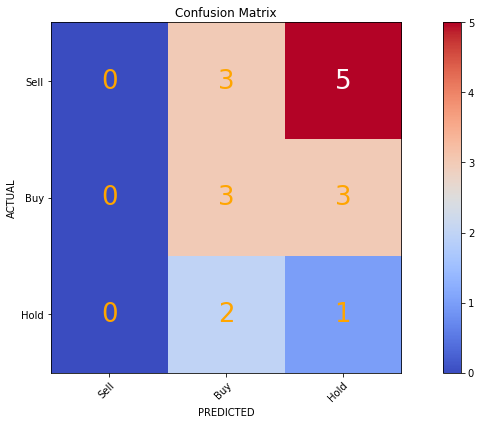

In [8]:
plot_confusion_matrix(y_test, pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

## Tuning Model Parameters

In [9]:
from sklearn.model_selection import GridSearchCV

### Parameters

In [10]:
# Parameters to Tune
params = {'var_smoothing': [1.5**-i for i in range(-20,20, 2)]}

In [11]:
search = GridSearchCV(clf, params, cv=3, return_train_score=True, verbose=5, scoring='f1_macro')

search.fit(X,y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] var_smoothing=3325.256730079651 .................................
[CV]  var_smoothing=3325.256730079651, score=(train=0.204, test=0.202), total=   0.0s
[CV] var_smoothing=3325.256730079651 .................................
[CV]  var_smoothing=3325.256730079651, score=(train=0.201, test=0.208), total=   0.0s
[CV] var_smoothing=3325.256730079651 .................................
[CV]  var_smoothing=3325.256730079651, score=(train=0.205, test=0.200), total=   0.0s
[CV] var_smoothing=1477.8918800354004 ................................
[CV]  var_smoothing=1477.8918800354004, score=(train=0.204, test=0.202), total=   0.0s
[CV] var_smoothing=1477.8918800354004 ................................
[CV]  var_smoothing=1477.8918800354004, score=(train=0.201, test=0.208), total=   0.0s
[CV] var_smoothing=1477.8918800354004 ................................
[CV]  var_smoothing=1477.8918800354004, score=(train=0.205, test=0.200), total=  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-pack


[CV] var_smoothing=129.746337890625 ..................................
[CV]  var_smoothing=129.746337890625, score=(train=0.204, test=0.202), total=   0.0s
[CV] var_smoothing=129.746337890625 ..................................
[CV]  var_smoothing=129.746337890625, score=(train=0.201, test=0.208), total=   0.0s
[CV] var_smoothing=129.746337890625 ..................................
[CV]  var_smoothing=129.746337890625, score=(train=0.205, test=0.200), total=   0.0s
[CV] var_smoothing=57.6650390625 .....................................
[CV]  var_smoothing=57.6650390625, score=(train=0.204, test=0.202), total=   0.0s
[CV] var_smoothing=57.6650390625 .....................................
[CV]  var_smoothing=57.6650390625, score=(train=0.201, test=0.208), total=   0.0s
[CV] var_smoothing=57.6650390625 .....................................
[CV]  var_smoothing=57.6650390625, score=(train=0.205, test=0.200), total=   0.0s
[CV] var_smoothing=25.62890625 .......................................
[

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  var_smoothing=2.25, score=(train=0.409, test=0.260), total=   0.0s
[CV] var_smoothing=2.25 ..............................................
[CV]  var_smoothing=2.25, score=(train=0.294, test=0.215), total=   0.0s
[CV] var_smoothing=2.25 ..............................................
[CV]  var_smoothing=2.25, score=(train=0.410, test=0.200), total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV]  var_smoothing=1.0, score=(train=0.397, test=0.260), total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV]  var_smoothing=1.0, score=(train=0.405, test=0.159), total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV]  var_smoothing=1.0, score=(train=0.410, test=0.200), total=   0.0s
[CV] var_smoothing=0.4444444444444444 ................................
[CV]  var_smoothing=0.4444444444444444, score=(train=0.426, test=0.321), total=   0.0s
[CV] var_smoothing=0.4444444444444444 ..............

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio


[CV] var_smoothing=0.0077073466292589396 .............................
[CV]  var_smoothing=0.0077073466292589396, score=(train=0.434, test=0.323), total=   0.0s
[CV] var_smoothing=0.0077073466292589396 .............................
[CV]  var_smoothing=0.0077073466292589396, score=(train=0.526, test=0.116), total=   0.0s
[CV] var_smoothing=0.0077073466292589396 .............................
[CV]  var_smoothing=0.0077073466292589396, score=(train=0.588, test=0.257), total=   0.0s
[CV] var_smoothing=0.0034254873907817508 .............................
[CV]  var_smoothing=0.0034254873907817508, score=(train=0.413, test=0.323), total=   0.0s
[CV] var_smoothing=0.0034254873907817508 .............................
[CV]  var_smoothing=0.0034254873907817508, score=(train=0.526, test=0.116), total=   0.0s
[CV] var_smoothing=0.0034254873907817508 .............................
[CV]  var_smoothing=0.0034254873907817508, score=(train=0.588, test=0.258), total=   0.0s
[CV] var_smoothing=0.001522438840

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None,
             param_grid={'var_smoothing': [3325.256730079651,
                                           1477.8918800354004,
                                           656.8408355712891,
                                           291.92926025390625, 129.746337890625,
                                           57.6650390625, 25.62890625,
                                           11.390625, 5.0625, 2.25, 1.0,
                                           0.4444444444444444,
                                           0.19753086419753085,
                                           0.0877914951989026,
                                           0.03901844231062338,
                                           0.017341529915832612,
                                           0.0077073466292589396,
                                           0

### Tuned Results

In [12]:
print("Mean Training Score:", np.mean(search.cv_results_['mean_train_score']))
print("Mean Testing Score:", search.score(X, y))
print("\nBest Parameter Found:")
search.best_params_

Mean Training Score: 0.35730132921105373
Mean Testing Score: 0.4457251369016075

Best Parameter Found:


{'var_smoothing': 0.4444444444444444}

### Model with the Best Parameters

In [13]:
search_clf = search.best_estimator_

search_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.4444444444444444)

#### Results from Optimum Parameters

In [14]:
# Classifier predictions
s_pred = search_clf.predict(X_test)

#Printing out results
report = classification_report(y_test, s_pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.00      0.00      0.00         8
         Buy       0.35      1.00      0.52         6
        Hold       0.00      0.00      0.00         3

    accuracy                           0.35        17
   macro avg       0.12      0.33      0.17        17
weighted avg       0.12      0.35      0.18        17



C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Confusion Matrix for Optimum Parameters

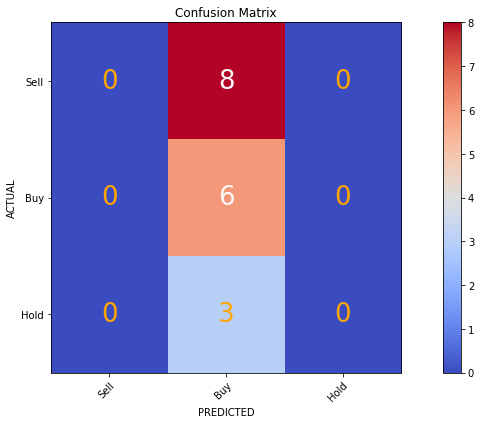

In [15]:
plot_confusion_matrix(y_test, s_pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()